## algorithm design and anlysis-2025 spring  homework 2
**Deadline**：2025.5.14

**name**:


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1  

> 给定一个已排序的链表的头 `head` ， *删除所有重复的元素，使每个元素只出现一次* 。返回 *已排序的链表* 。链表的类如下所示：

```python
class NodeList:
    def __init__(self, val=None, right=None):
        self.val   = val
        self.right = right
```

输入是一个数组，你首先需要将数组转化为链表，然后删除链表中的重复元素，再遍历链表元素，以一个数组的形式返回。请设计一个算法解决上述任务，分析算法设计思路，计算时间复杂度, 并基于python编程实现。

e.g.  输入：head=[1, 1, 2, 3, 3]   输出：[1, 2, 3]

![image-20240502110020439](./fig/hw2q1.png)



idea：链表去重问题，类似于 力扣83题（删除排序链表中的重复元素）。可以先遍历链表，比较当前节点和下一个节点的值。如果当前节点和下一个节点的值相同，则跳过下一个节点。不同的话，则继续遍历。由于链表已排序，重复元素一定是连续的。这样就可以在去重的基础上保证排序。

In [2]:
# add your idea here
class Node:
    def __init__(self, val=None, right=None):
        self.val = val
        self.right = right


def delete_duplicates(head):
    # 如果链表为空或只有一个节点，直接返回
    if not head or not head.right:
        return head

    # 当前节点
    current = head

    # 遍历链表
    while current and current.right:
        # 如果当前节点和下一个节点值相同，跳过下一个节点
        if current.val == current.right.val:
            current.right = current.right.right
        else:
            # 如果值不同，移动到下一个节点
            current = current.right

    return head


# 辅助函数：将列表转换为链表
def list_to_linked_list(arr):
    if not arr:
        return None
    dummy = Node(0)
    current = dummy
    for val in arr:
        current.right = Node(val)
        current = current.right
    return dummy.right


# 辅助函数：将链表转换为列表（用于验证输出）
def linked_list_to_list(head):
    result = []
    current = head
    while current:
        result.append(current.val)
        current = current.right
    return result


# 测试代码
head = [1, 1, 2, 3, 3]
linked_list = list_to_linked_list(head)
result = delete_duplicates(linked_list)
output = linked_list_to_list(result)
print(output)  # 输出: [1, 2, 3]
# your algorithm time complexity is:O(n)


[1, 2, 3]


## 问题 2  

> 下面是一个经典的算法问题：
>
> - 给定包含n个整数的一个整数数组 `nums` 和一个整数目标值 `target`，请你在该数组中找出 **和为目标值** *`target`* 的那 **两个** 整数，并返回它们的**数组下标**。假设每种输入只会对应一个答案。但是，数组中同一个元素在答案里不能重复出现。你可以按任意顺序返回答案。
>
> 由于要多次查找数组中元素的位置，为了提高查询效率可以使用哈希表来存储数组中的数据，在哈希表中查询一个元素的复杂度为O(1)。 已知python中的字典是使用哈希表实现的，即使用`dict[key]`查询对应的value时间复杂度为O(1), python提供了查询字典是否包含某个key的功能：`key in dict`，时间复杂度也是O(1)

请根据上面信息，设计一个时间复杂度为O(n) 的算法，解决上述算法问题

e.g.   

输入：nums=[2,7,11,15], target=9， 输出：[0，1]

输入：nums=[3,2,4], target=6, 输出：[1,2]

输入：nums=[3,3], target=6,  输出：[0,1]


In [3]:
# add your idea here
def twoSum(nums, target):
    # 创建一个哈希表，存储 {元素: 下标}
    num_dict = {}

    # 遍历数组
    for i in range(len(nums)):
        # 计算需要的另一个数
        complement = target - nums[i]

        # 如果 complement 在哈希表中，找到答案
        if complement in num_dict:
            return [num_dict[complement], i]

        # 否则将当前元素和下标存入哈希表
        num_dict[nums[i]] = i

    # 题目保证有解，无需处理无解情况
    return []


# 测试代码
print(twoSum([2, 7, 11, 15], 9))  # 输出: [0, 1]
print(twoSum([3, 2, 4], 6))  # 输出: [1, 2]
print(twoSum([3, 3], 6))  # 输出: [0, 1]
# your algorithm time complexity is: O(n)

[0, 1]
[1, 2]
[0, 1]


## 问题 3:   

> 栈是一种常用的数据结构，编译器中通常使用栈来实现表达式求值。
>
> 以表达式 $3+5 \times 8-6$​ 为例。编译器使用两个栈来完成运算，即一个栈保持操作数，另一个栈保存运算符。
>
> 1. 从左向右遍历表达式，遇到数字就压入操作数栈；
>
> 2. 遇到运算符，就与运算符栈的栈顶元素进行比较。如果比运算符栈顶元素的优先级高，就将当前运算符压入栈；如果比运算符栈顶元素的优先级低或者相同，从运算符栈中取栈顶运算符，从操作数栈的栈顶取 2 个操作数，然后进行计算，再把计算完的结果压入操作数栈，继续比较。
>
> 下图是 $3+5 \times 8-6$  这个表达式的计算过程：

![figure](./fig/hw2q3.png)

根据上述原理，请设计一个算法完成表达式的运算，当输入为表达式字符串，返回对应的计算结果。分析算法设计思路，计算时间复杂度，并基于python编程实现

**note：**

1. 假设输入的表达式只会出现加（“+”），减 “-”， 乘“*”，除 “/” 四个运算符, 表达式中只会出现正整数
2. python中` str.isdigit()`函数可以判断字符串str是否为数字，



e.g. :
---

1. 输入：“$3+5 * 8 -6$”   输出：37

2. 输入：“$34+13*9 + 44-12/3$”  输出：191

idea：表达式求值问题，类似于力扣227，处理优先级，考虑使用栈来进行处理，遇到*或者/时，从栈中弹出一个数字，与当前数字计算后压回栈。遇到+或者-，将当前数字压入栈，并记录运算符。遍历结束之后，就可以将栈中所有数字累加，得到最终结果

In [8]:
# add your idea here
def calculate(s):
    # 去除字符串中的空格
    s = s.replace(" ", "")

    # 初始化栈和变量
    stack = []
    num = 0  # 当前数字
    op = '+'  # 当前运算符，初始化为 '+' 表示第一个数字直接入栈

    i = 0
    while i < len(s):
        # 如果当前字符是数字，读取完整的数字
        if s[i].isdigit():
            num = 0
            while i < len(s) and s[i].isdigit():
                num = num * 10 + int(s[i])
                i += 1
            i -= 1  # 回退一位，因为 i 会多加 1

            # 根据上一个运算符处理数字
            if op == '+':
                stack.append(num)
            elif op == '-':
                stack.append(-num)
            elif op == '×':
                stack.append(stack.pop() * num)
            elif op == '/':
                stack.append(int(stack.pop() / num))  # 题目要求整除，使用 int()

        # 如果当前字符是运算符，更新 op
        elif s[i] in "+-×/":
            op = s[i]

        i += 1

    # 最后将栈中所有数字累加
    return sum(stack)


# 测试代码
print(calculate("3 + 5 × 8 - 6"))  # 输出: 37
print(calculate("34 + 13 × 9 + 44 - 12 / 3"))  # 输出: 191
# your algorithm time complexity is: O(n)

37
191


## 问题 4:  

> 星球碰撞问题：现有n个星球，在同一条直线上运行，如数组A所示，元素的绝对值表示星球的质量，负数表示星球自右向左运动，正数表示星球自左向右运动，当两个星球相撞的时候，质量小的会消失，大的保持不变，**质量相同的两个星球碰撞后自右向左运动的星球消失，自左向右的星球保持不变**，假设所有星球的速度大小相同。
>
> $ A=[23,-8, 9, -3, -7, 9, -23, 22] $

请设计一个算法模拟星球的运行情况，输出最终的星球存续情况（输出一个数组），分析算法设计思路，计算时间复杂度，并基于python编程实现。

e.g.
---
1.  输入： A=[-3,-6,2,8, 5,-8,9,-2,1]， 输出：[-3, -6, 2, 8, 9, 1]

2. 输入：A=[23,-8, 9, -3, -7, 9, -23, 22], 输出：[23, 22]



idea:碰撞只发生在相邻星球方向相反时（一个向右，一个向左），碰撞后，绝对值大的星球存活，绝对值小的消失；如果绝对值相等，向左的（负数）消失。需要保持原始顺序，即存活星球的相对位置不能改变。处理此问题，首先从左到右遍历数组 A。对于每个星球，检查它与栈顶星球是否发生碰撞，如果栈为空，直接压入当前星球，如果栈不为空，检查碰撞条件（栈顶向右，当前向左），碰撞时，比较绝对值，决定谁存活，绝对值小的星球消失，绝对值相等时，当前星球消失，如果栈顶星球消失，弹出栈顶，继续与新的栈顶比较，如果不发生碰撞，直接将当前星球压入栈。遍历结束后，栈中剩余的星球就是存活的星球，按原始索引排序，输出存活星球的值。

In [7]:
def process_collisions(A):
    stack = []
    # 从左到右处理
    for i in range(len(A)):
        x = A[i]
        while True:
            if not stack:
                stack.append((x, i))
                break
            top_val, top_idx = stack[-1]
            # 相撞条件：栈顶为正（向右），当前为负（向左）
            if top_val > 0 and x < 0:
                abs_x = abs(x)
                abs_top = abs(top_val)
                if abs_x < abs_top:
                    break  # 当前星球 x 消失
                elif abs_x > abs_top:
                    stack.pop()  # 栈顶星球消失，继续比较
                else:
                    # 绝对值相等，负数（向左）消失，正数（向右）保持不变
                    break  # 当前星球 x（负数）消失
            else:
                # 不满足相撞条件，直接压入
                stack.append((x, i))
                break
    
    # 按原始索引排序，保持原始顺序
    stack.sort(key=lambda x: x[1])
    return [val for val, idx in stack]
A=[23,-8, 9, -3, -7, 9, -23, 22]
result = process_collisions(A)
print("输出:", result)
# your algorithm time complexity is: O(n^2)

输出: [23, 22]


## 问题 5 

> 给定一个无序数组nums=[9,-3,-10,0,9,7,33]，请建立一个二叉搜索树存储数组中的所有元素，之后删除二叉树中的元素“0”，再使用中序遍历输出二叉搜索树中的所有元素。

使用python编程完成上述任务，并计算时间复杂度


In [ ]:
# add your idea here
class Node:
    def __init__(self, val=0):
        self.val = val
        self.left = None
        self.right = None


class BST:
    def __init__(self):
        self.root = None

    def insert(self, val):
        # 插入节点，如果值已存在则忽略（去重）
        if not self.root:
            self.root = Node(val)
        else:
            self._insert_recursive(self.root, val)

    def _insert_recursive(self, node, val):
        if val < node.val:
            if node.left is None:
                node.left = Node(val)
            else:
                self._insert_recursive(node.left, val)
        elif val > node.val:
            if node.right is None:
                node.right = Node(val)
            else:
                self._insert_recursive(node.right, val)
        # 如果 val == node.val，忽略（去重）

    def delete(self, val):
        self.root = self._delete_recursive(self.root, val)

    def _delete_recursive(self, node, val):
        if not node:
            return None

        if val < node.val:
            node.left = self._delete_recursive(node.left, val)
        elif val > node.val:
            node.right = self._delete_recursive(node.right, val)
        else:
            # 找到要删除的节点
            # 情况 1：无子节点或只有一个子节点
            if not node.left:
                return node.right
            elif not node.right:
                return node.left
            # 情况 2：有两个子节点
            # 找到右子树的最小值（后继）
            successor = self._find_min(node.right)
            node.val = successor.val
            # 删除后继节点
            node.right = self._delete_recursive(node.right, successor.val)
        return node

    def _find_min(self, node):
        current = node
        while current.left:
            current = current.left
        return current

    def inorder(self):
        result = []
        self._inorder_recursive(self.root, result)
        return result

    def _inorder_recursive(self, node, result):
        if node:
            self._inorder_recursive(node.left, result)
            result.append(node.val)
            self._inorder_recursive(node.right, result)


# 主程序
nums = [9, -3, -10, 0, 9, 7, 33]

# 步骤 1：构建 BST
bst = BST()
seen = set()  # 用于去重
for num in nums:
    if num not in seen:
        bst.insert(num)
        seen.add(num)

# 步骤 2：删除元素 0
bst.delete(0)

# 步骤 3：中序遍历
result = bst.inorder()

# 步骤 4：输出结果
print(result)  # 输出: [-10, -3, 7, 9, 33]
# your algorithm time complexity is:O(nlogn)

## 问题 6  

> 给定一个包含大写字母和小写字母的字符串 s ，返回 字符串包含的 **最长的回文子串的长度** 。请注意 区分大小写 。比如 "Aa" 不能当做一个回文字符串。
>

请设计一个算法解决上述问题，只需要输出最长回文子串的长度，分析算法设计思路，计算时间复杂度，并基于python编程实现

e.g. 输入： s="adccaccd"，  输出：7。 最长回文子串为："dccaccd", 长度为7


idea：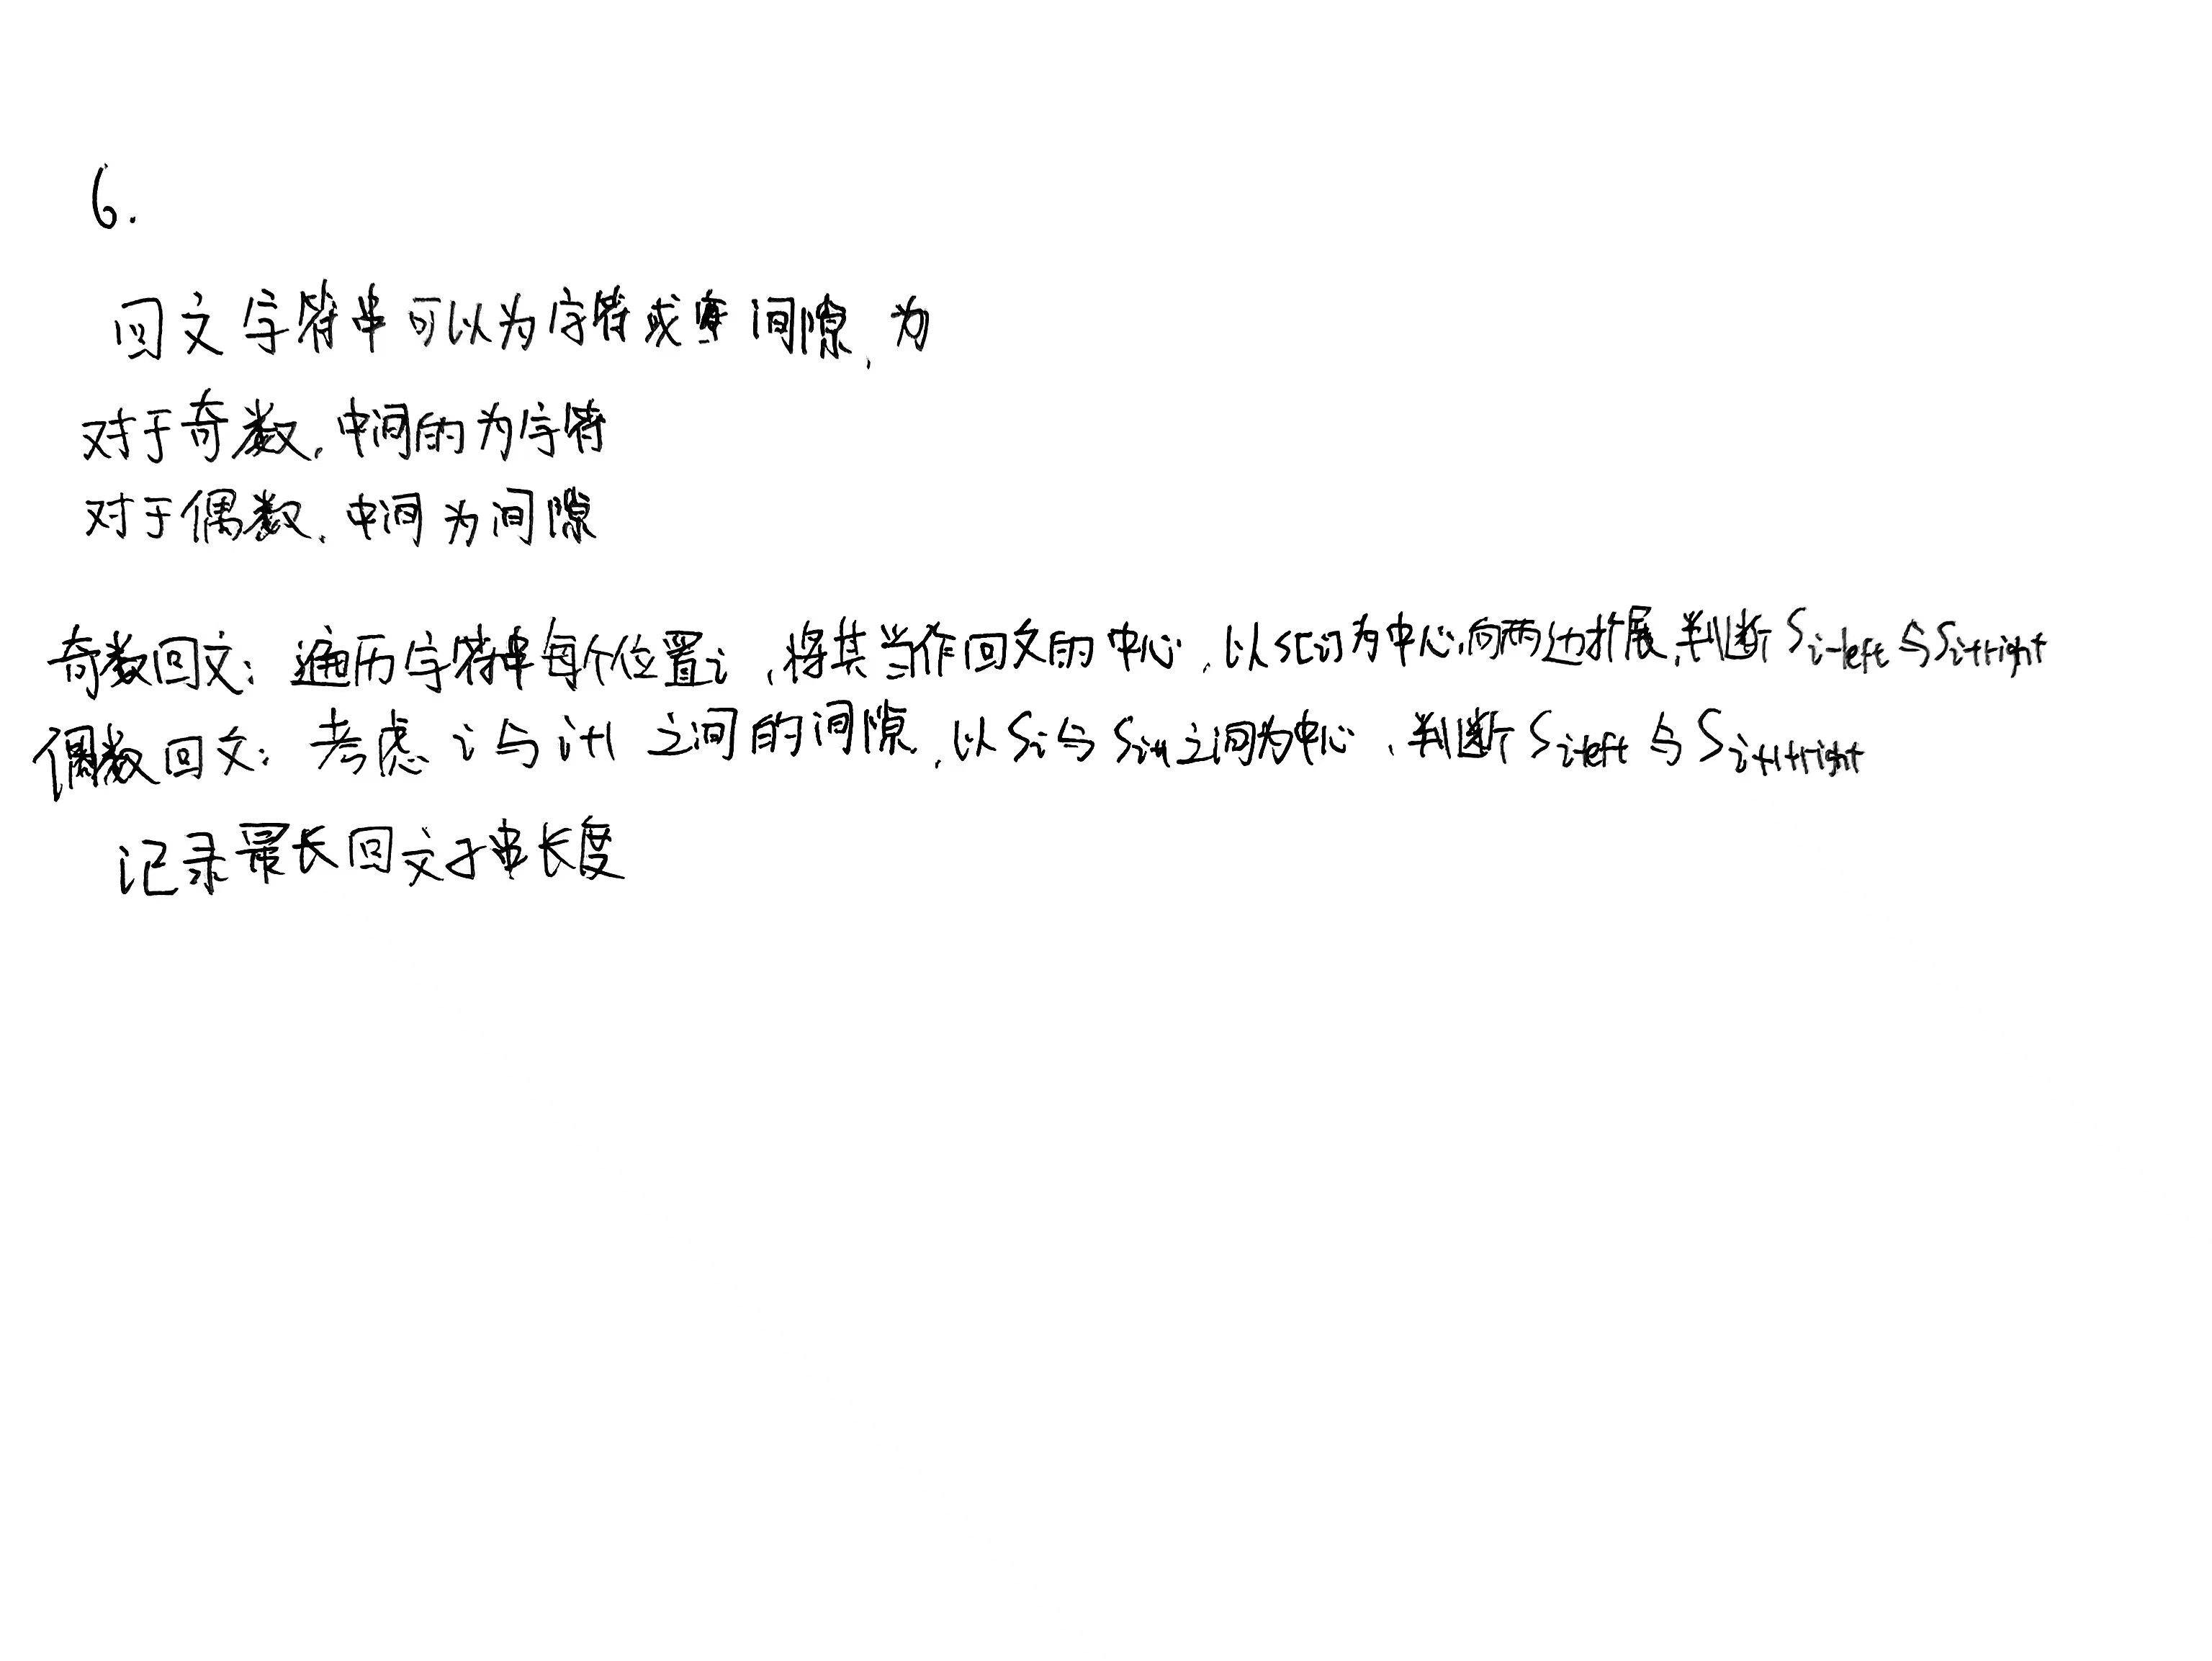

In [ ]:
# add your idea here
def longestPalindromeLength(s):
    if not s:
        return 0

    max_length = 0

    # 中心扩展法
    for i in range(len(s)):
        # 奇数长度回文，以 s[i] 为中心
        left, right = i, i
        while left >= 0 and right < len(s) and s[left] == s[right]:
            max_length = max(max_length, right - left + 1)
            left -= 1
            right += 1

        # 偶数长度回文，以 s[i] 和 s[i+1] 之间的空隙为中心
        left, right = i, i + 1
        while left >= 0 and right < len(s) and s[left] == s[right]:
            max_length = max(max_length, right - left + 1)
            left -= 1
            right += 1

    return max_length


# 测试代码
s = "adccaccd"
print(longestPalindromeLength(s))  # 输出: 7
# your algorithm time complexity is:O(n^2)

## 问题 7 

> 沿一条长河流分散着n座房子。你可以把这条河想象成一条轴，房子是由它们在这条轴上的坐标按顺序排列的。你的公司想在河边的特定地点设置手机基站，这样每户人家都在距离基站4公里的范围内。输入可以看作为一个升序数组，数组元素的取值为大于等于0的正整数，你需要输出最小基站的数目，基站的位置。

1. 给出一个时间复杂度为$O(n$) 的算法，使所使用的基站数量最小化，分析算法设计思路，使用python编程实现
2. 证明1.中算法产生了最优解决方案。

e.g. 

输入： [1, 5, 12, 33, 34,35]  输出：基站数目为3， 基站位置为[1，12，33]



idea：对于此问题，主要是找到所有两个元素的组合，满足 nums[i] + nums[j] = max(nums)，且 i < j。可以使用双指针来尝试解决，找到最大元素：遍历数组，找到最大元素 max_val。将数组排序，方便使用双指针法查找和为 max_val 的组合。使用两个指针 left 和 right，分别指向数组的开头和结尾。然后计算 nums[left] + nums[right]：
如果和等于 max_val，记录当前组合 left,right。如果和小于 max_val，left 右移。如果和大于 max_val，right 左移。由于组合需要按升序排列，最后排序后刚好满足升序。

In [ ]:
# add your idea here
def min_base_stations(houses):
    if not houses:
        return 0, []

    n = len(houses)
    count = 0  # 基站数量
    positions = []  # 基站位置
    i = 0

    while i < n:
        # 当前未覆盖的最左房子
        count += 1
        # 基站位置：选择房子位置以匹配示例输出
        station_pos = houses[i]
        positions.append(station_pos)
        # 覆盖范围：[houses[i], houses[i]+8]
        cover_end = houses[i] + 8

        # 跳过所有被当前基站覆盖的房子
        while i < n and houses[i] <= cover_end:
            i += 1

    return count, positions


# 测试代码
houses = [1, 5, 12, 33, 34, 35]
count, positions = min_base_stations(houses)
print(f"基站数目为: {count}, 基站位置为: {positions}")  # 输出: 基站数目为: 3, 基站位置为: [1, 12, 33]
# your algorithm time complexity is:O(nlogn)

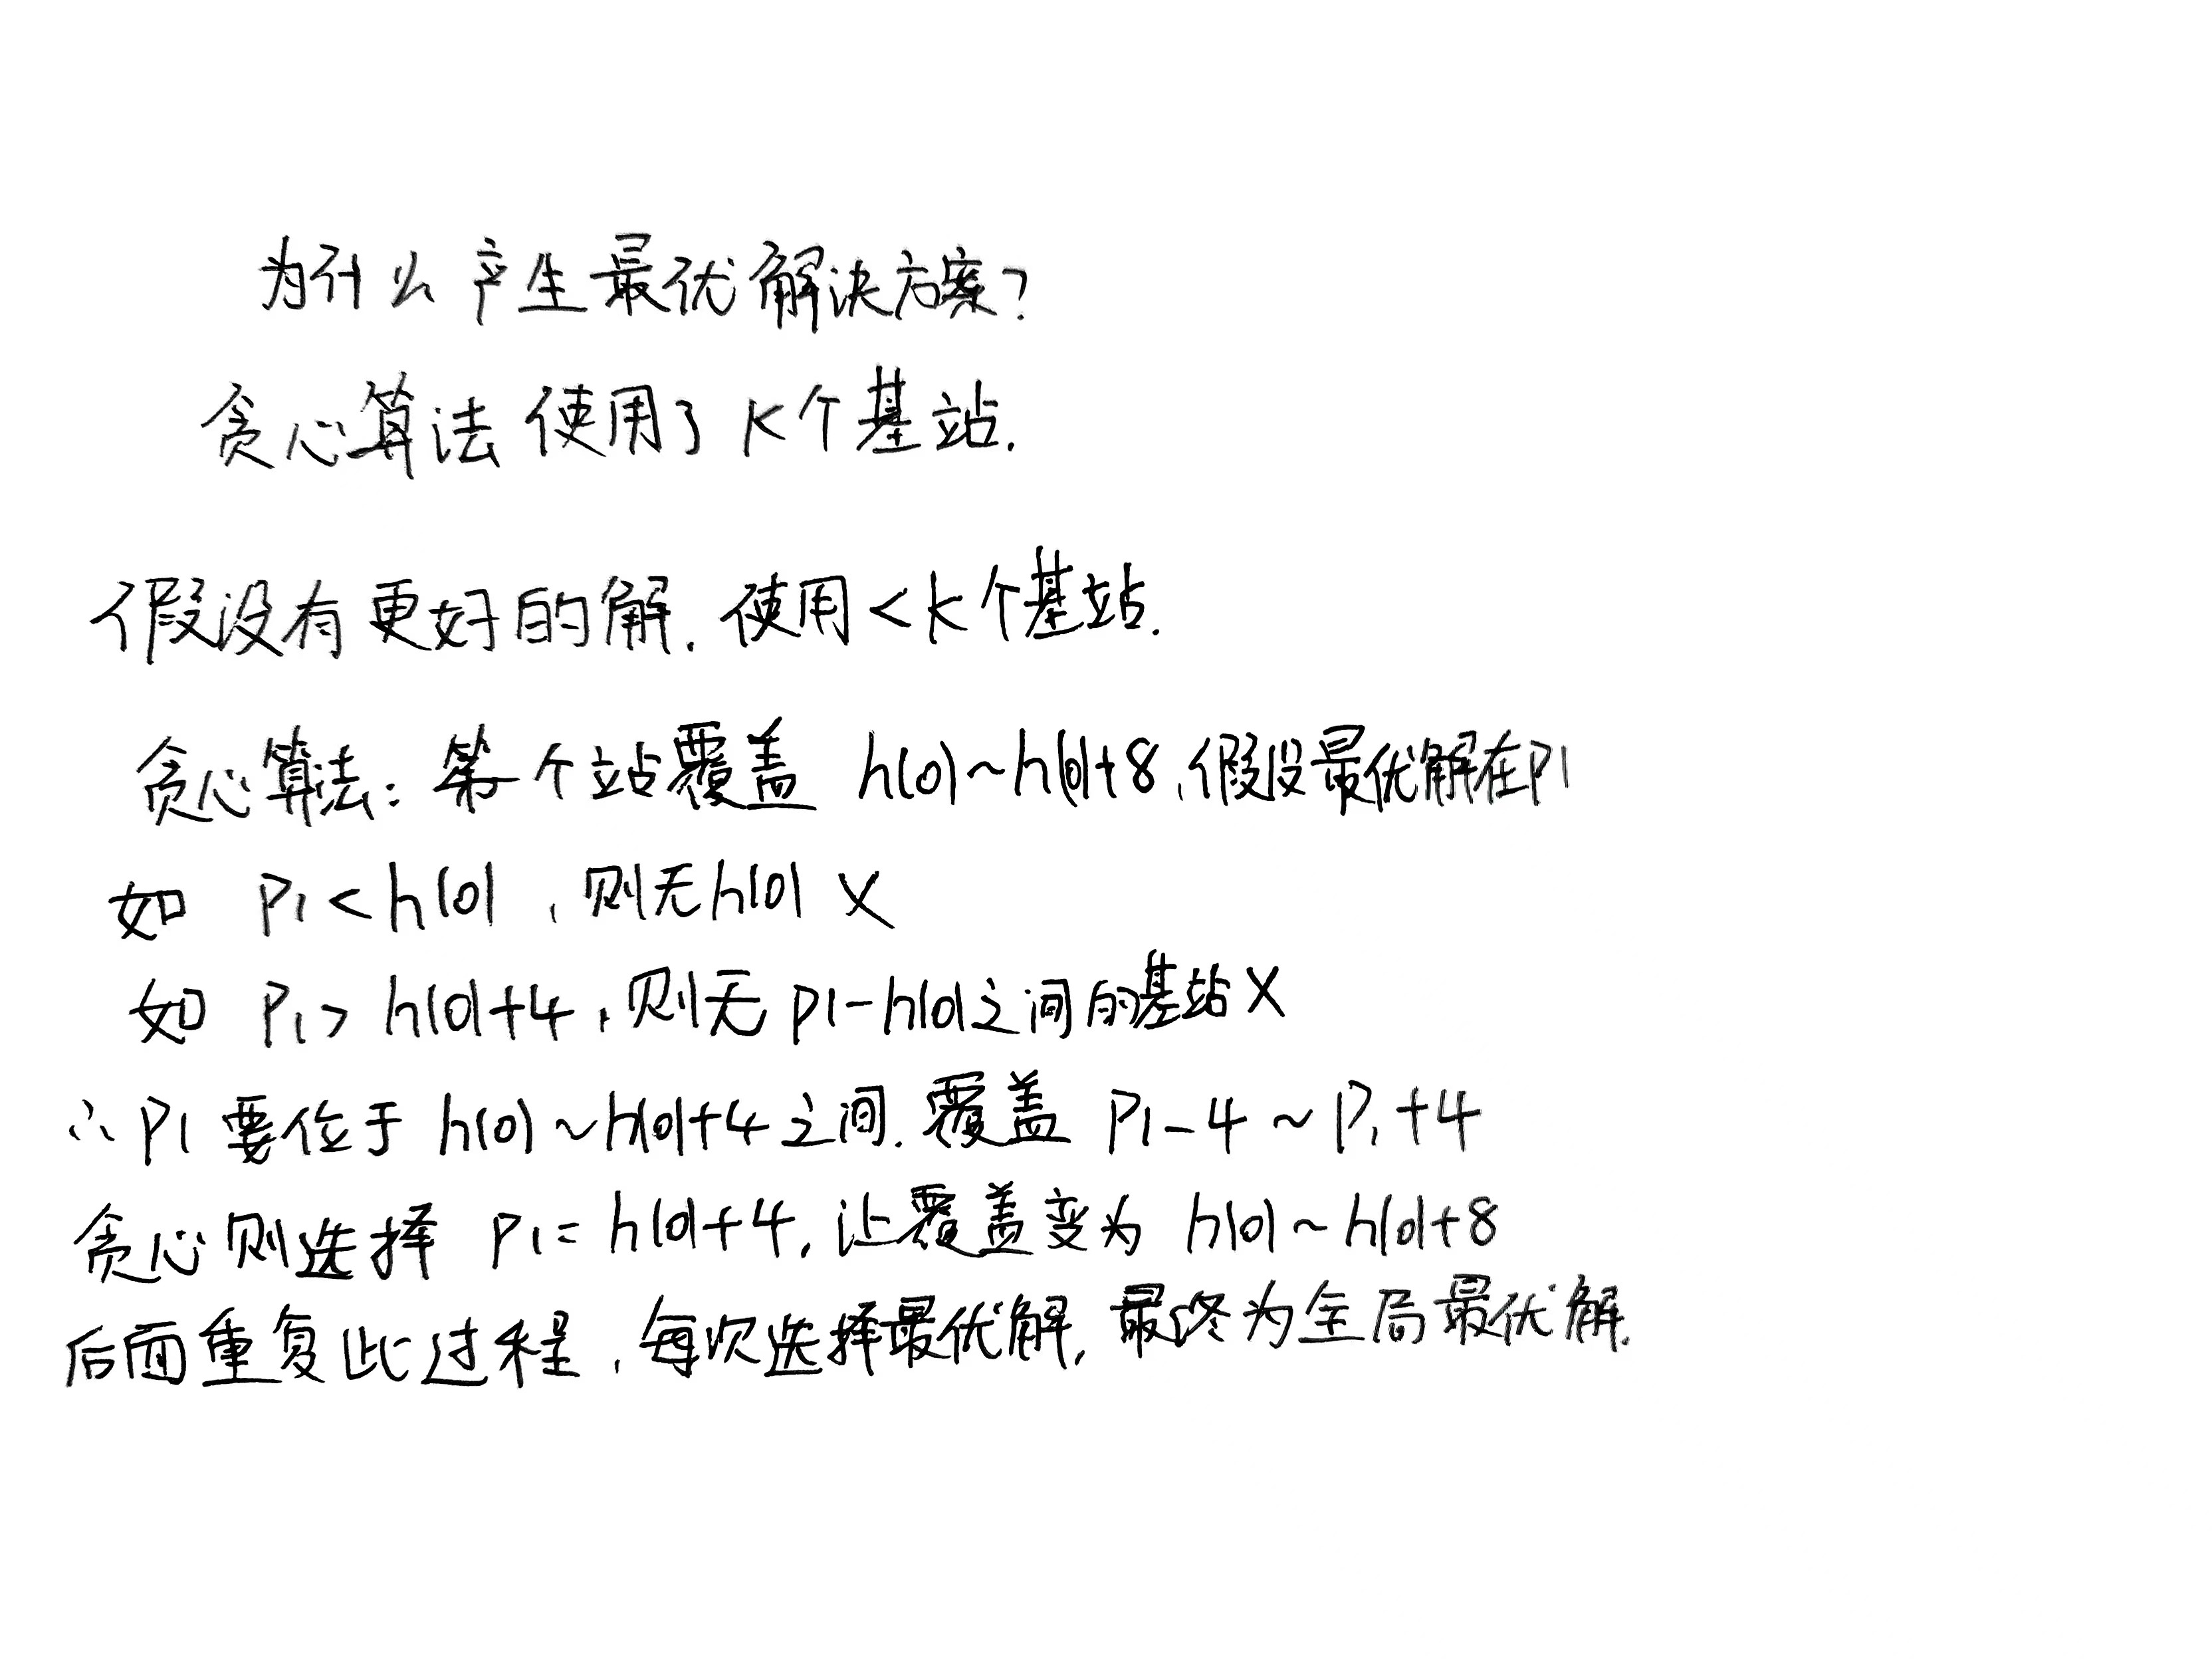

## 问题 8  

> 给定由n个正整数组成的一个集合$S = \{a_1, a_2，···，a_n\}$和一个正整数W，设计一个算法确定是否存在S的一个子集 $K \subseteq S$, 使K中所有数之和为 $W$, 如果存在返回“True”，否则返回“False”

请设计一个时间复杂度为$O(nW)$动态规划算法，解决上述问题，分析算法的设计思路，并且基于python编程实现（不需要输出子集）。

e.g. 

输入：S = {1,4,7,3,5}， W = 11，输出：True。   因为K可以是{4,7}。



idea：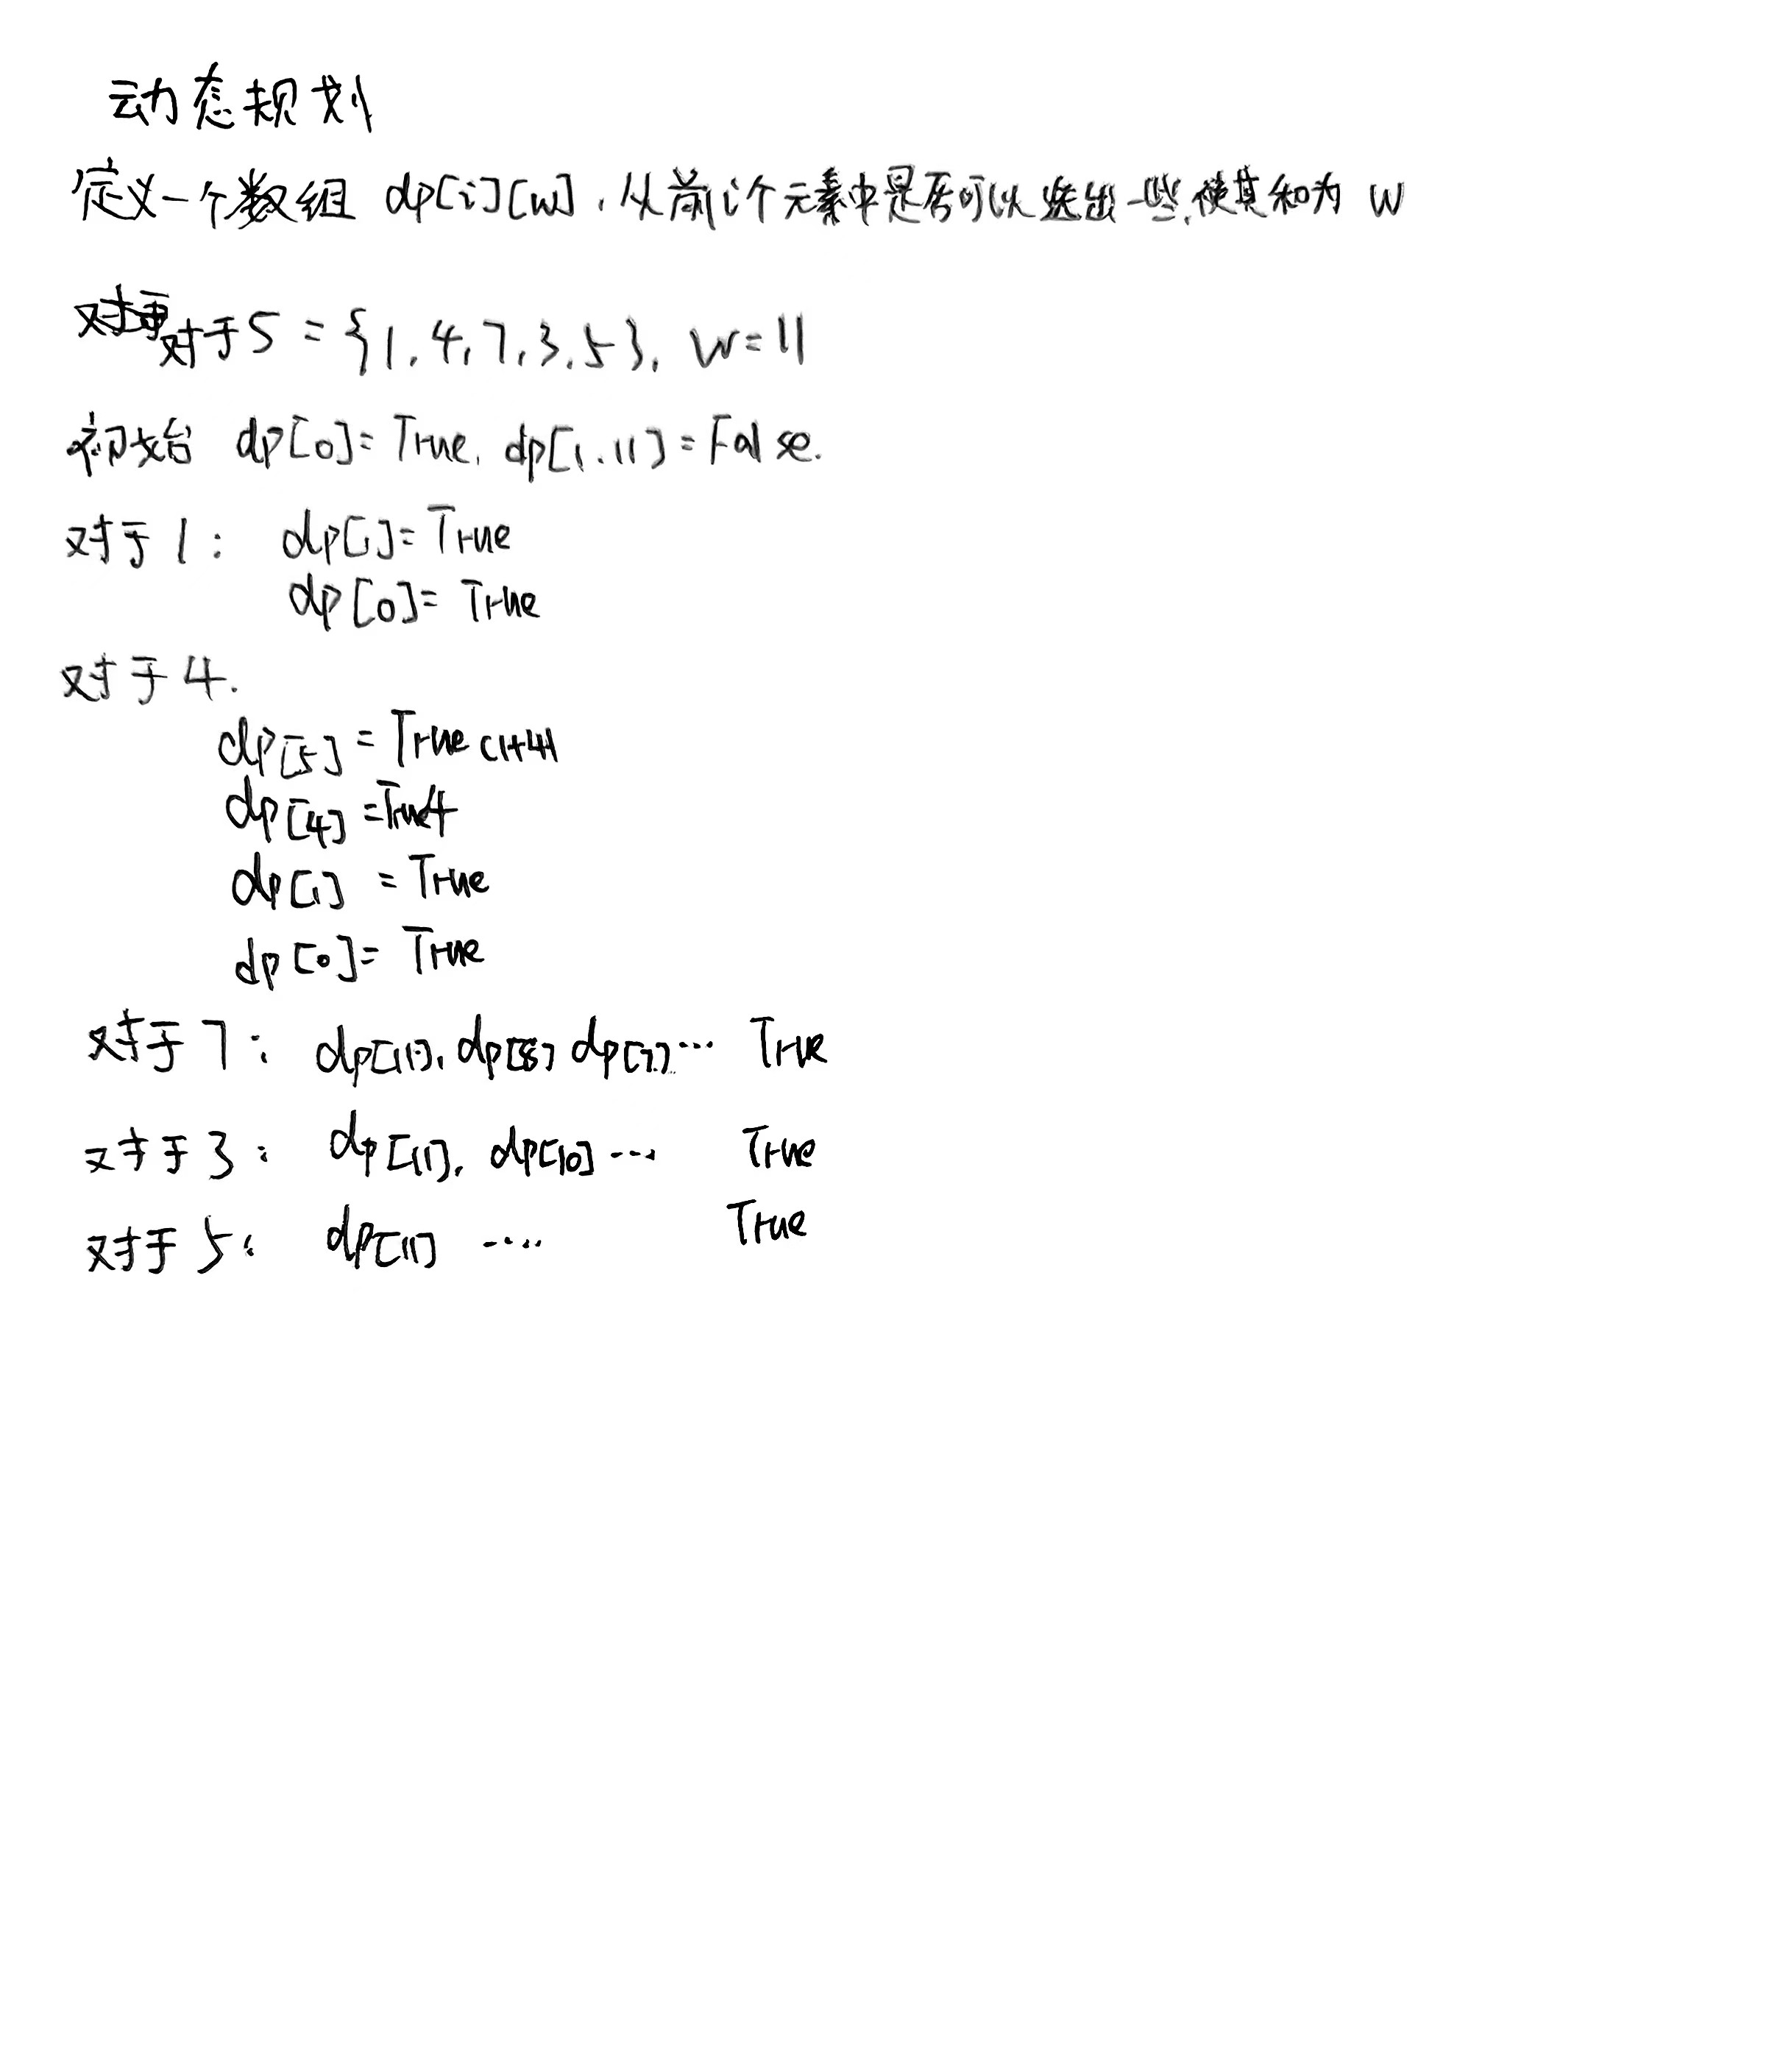

In [ ]:
# add your idea here
def subset_sum(S, W):
    n = len(S)
    # 一维 dp 数组，dp[w] 表示是否可以组成和 w
    dp = [False] * (W + 1)
    dp[0] = True  # 空子集和为 0

    # 动态规划
    for i in range(n):
        # 从大到小更新，避免覆盖
        for w in range(W, -1, -1):
            if w >= S[i] and dp[w - S[i]]:
                dp[w] = True

    return dp[W]


# 测试代码
S = [1, 4, 7, 3, 5]
W = 11
print(subset_sum(S, W))  # 输出: True
# your algorithm time complexity is: O(nW)



## 问题 9 

> 给定一个n个物品的集合。物体的重量为$w_1, w_2，…、w_n$，物品的价值分别是$v_1、v_2、…v_n$。给你**两个**重量为 $c$ 的背包。如果你带了一个东西，它可以放在一个背包里，也可以放在另一个背包里，但不能同时放在两个背包里。所有权重和价值都是正整数。

1. 设计一个时间复杂度为 $O(nc^2)$ 的动态规划算法，确定可以放入两个背包的物体的最大价值。分析算法设计思路，并基于python编程实现
2. \* 修改1中的算法，输出每个背包的内容（物品对应下标）。

e.g.: 

输入 V=[1,3,2,5,8,7], W=[1,3,2,5,8,7], c=7, 输出：最大价值=14，背包装的物品为：[6] [4，3] （同一个背包中物品装入顺序对结果无影响）  


idea：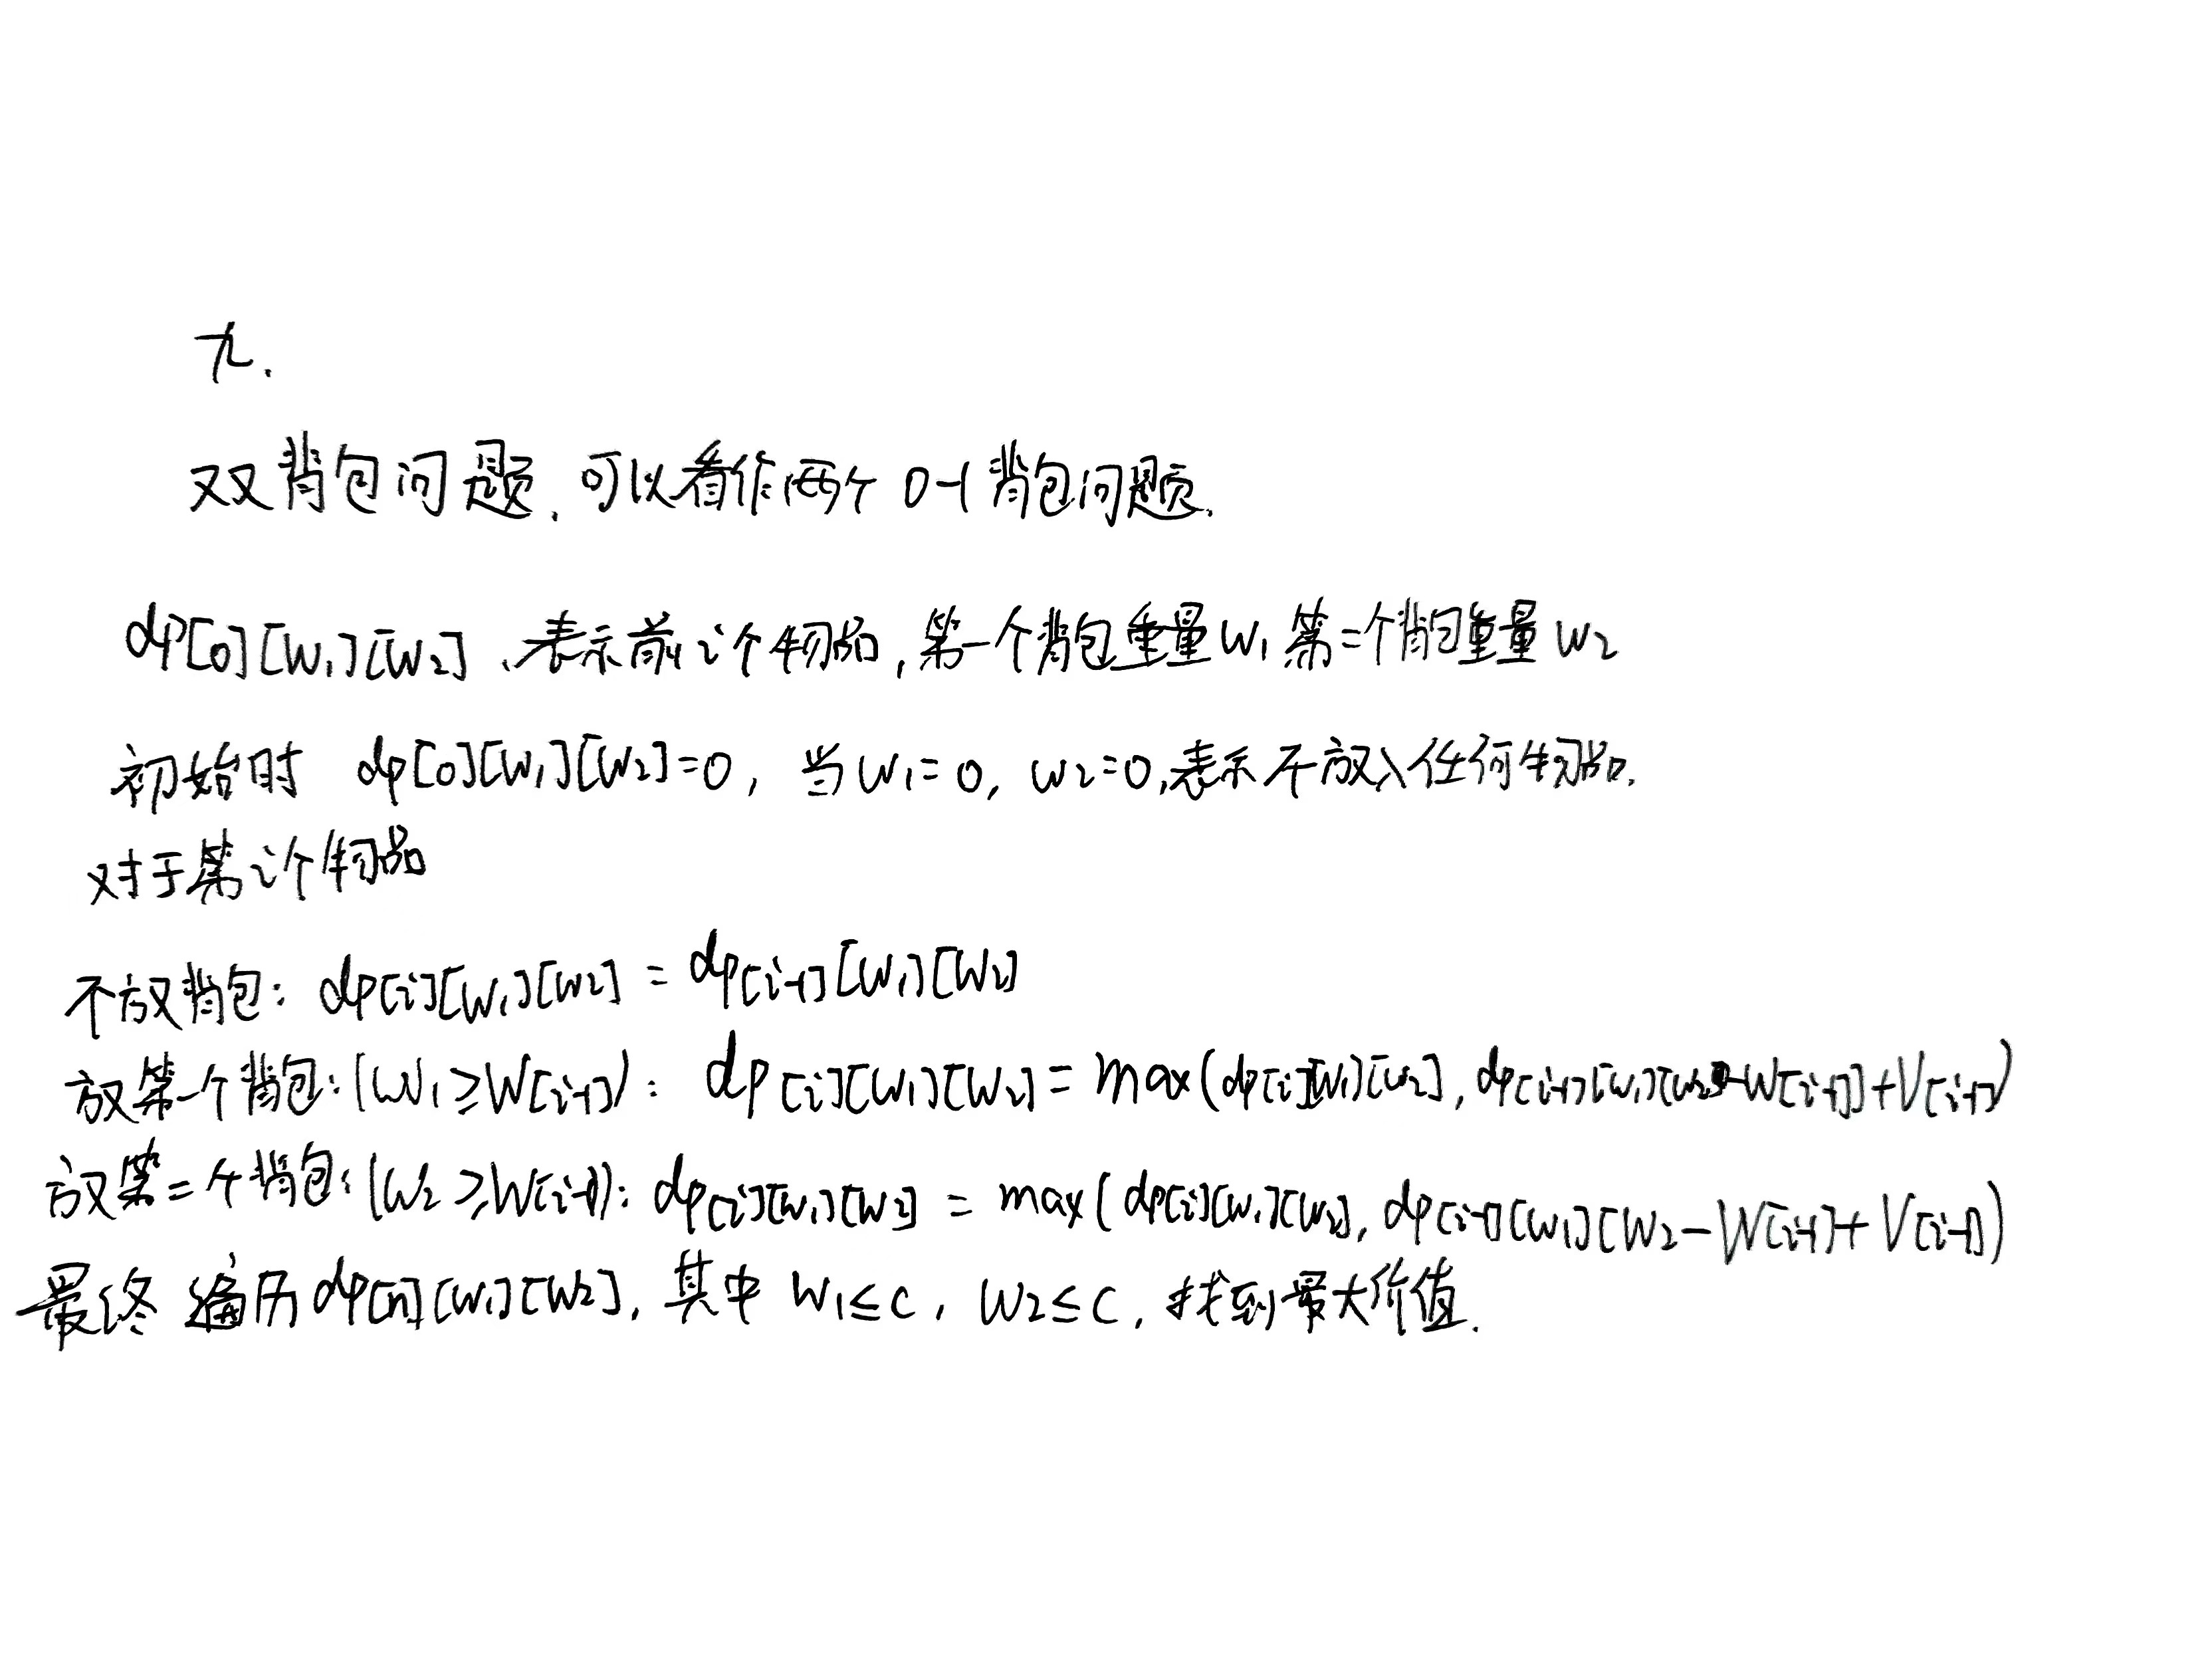

In [ ]:
# add your idea here
def two_knapsacks_max_value(V, W, c):
    n = len(V)
    # 使用滚动数组优化，dp[w1][w2] 表示当前状态的最大价值
    dp = [[0] * (c + 1) for _ in range(c + 1)]

    # 动态规划
    for i in range(1, n + 1):
        # 创建新的 dp 数组，存储当前阶段的结果
        new_dp = [[0] * (c + 1) for _ in range(c + 1)]
        for w1 in range(c + 1):
            for w2 in range(c + 1):
                # 不放当前物品
                new_dp[w1][w2] = dp[w1][w2]

                # 放进第一个背包
                if w1 >= W[i - 1]:
                    new_dp[w1][w2] = max(new_dp[w1][w2], dp[w1 - W[i - 1]][w2] + V[i - 1])

                # 放进第二个背包
                if w2 >= W[i - 1]:
                    new_dp[w1][w2] = max(new_dp[w1][w2], dp[w1][w2 - W[i - 1]] + V[i - 1])

        dp = new_dp  # 更新 dp 数组

    # 找到最大价值
    max_value = 0
    for w1 in range(c + 1):
        for w2 in range(c + 1):
            max_value = max(max_value, dp[w1][w2])

    return max_value


# 测试代码
V = [1, 3, 2, 5, 8, 7]
W = [1, 3, 2, 5, 8, 7]
c = 7
max_value = two_knapsacks_max_value(V, W, c)
print(f"最大价值: {max_value}")  # 输出: 最大价值: 14
# your algorithm time complexity is: O(nc^2)

## 问题 10 

> 给定两个字符串 $x[1..n]$ 和 $y[1..m]$，我们想通过以下操作将 $x$ 变换为 $y$ :
>
> **插入**：在 $x$ 中插入一个字符(在任何位置)；**删除**：从 $x$ 中删除一个字符(在任何位置)； **替换**：用另一个字符替换 $x$ 中的一个字符。
>
> 例如: $x = abcd$, $y = bcfe$，
>
> - 将 $x$ 转换为 $y$ 的一种可能方法是：1. 删除 $x$ 开头的 $a$, $x$变成 $bcd$； 2. 将 $x$ 中的字符 $d$ 替换为字符 $f$。$x$ 变成 $bcf$； 3. 在 $x$ 的末尾插入字符 $e$。$x$ 变成 $bcfe$。
>
> - 另一种可能的方法：1. 删除 $x$ 开头的 $a$,  $x$ 变成 $bcd$； 2. 在 $x$ 中字符 $d$ 之前插入字符 $f$。$x$ 变成 $bcfd$。3. 将 $x$ 中的字符 $d$ 替换为字符 $e$。$x$ 变成 $bcfe$。

设计一个时间复杂度为 $O(mn)$ 的算法，返回将 $x$ 转换为 $y$ 所需的最少操作次数。分析算法设计思路，并基于python编程实现。


idea：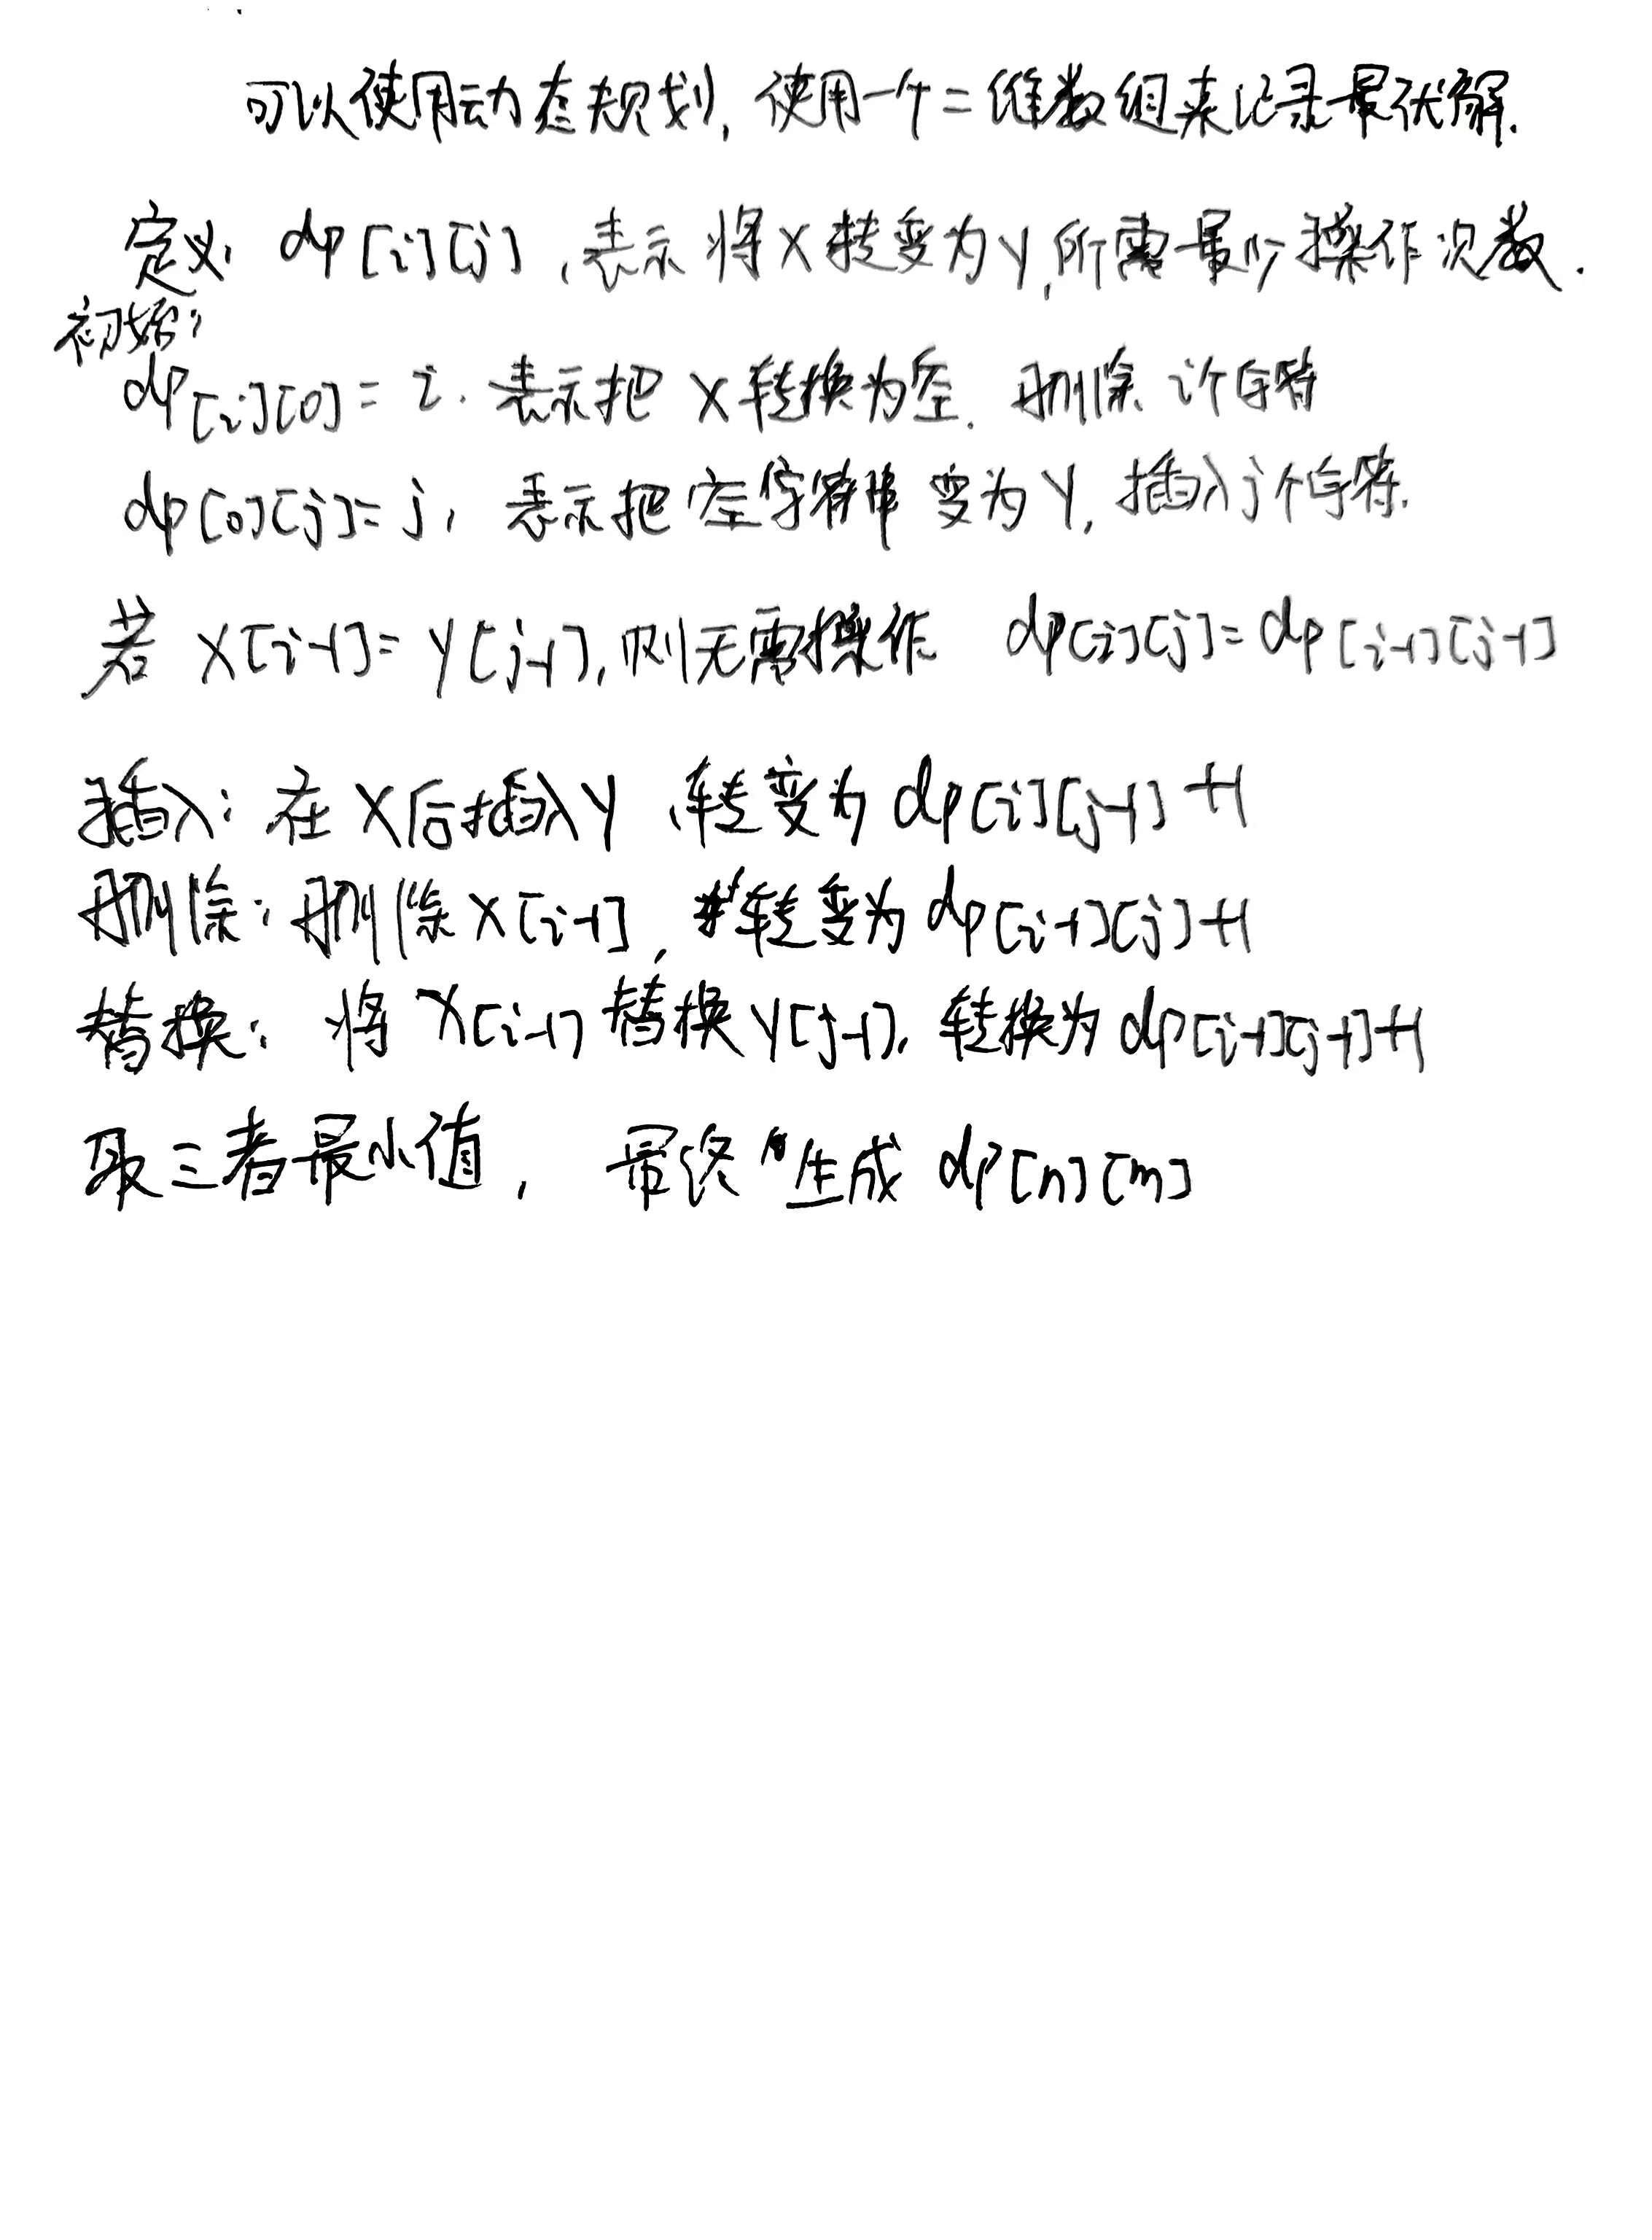

In [ ]:
# add your idea here
def edit_distance(x, y):
    n, m = len(x), len(y)
    # dp[i][j] 表示将 x[0:i] 转换为 y[0:j] 的最少操作次数
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    # 初始化
    for i in range(n + 1):
        dp[i][0] = i  # 删除 i 个字符
    for j in range(m + 1):
        dp[0][j] = j  # 插入 j 个字符

    # 动态规划
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if x[i - 1] == y[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(
                    dp[i][j - 1] + 1,  # 插入
                    dp[i - 1][j] + 1,  # 删除
                    dp[i - 1][j - 1] + 1  # 替换
                )

    return dp[n][m]


# 测试代码
x = "abcd"
y = "abce"
print(edit_distance(x, y))  # 输出: 2

# your algorithm time complexity is: O(mn)